In [218]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [241]:
df = pd.read_csv("/tmp/learn_log", sep='\t', names=
                     ['learner', 'tick', 'action_id', 'learner_id', 'loss', 'dL_dy', 'updated_score',
                     'truth_estimate',
                     'reward'])

In [242]:
df

,learner,tick,action_id,learner_id,loss,dL_dy,updated_score,truth_estimate,reward
0,learner,101,TrivialResponse,6,19.933742,-8.929444,0.000000,4.464722,-20.000000
1,learner,101,AskSuccessAction,5,19.933742,-8.929444,0.000000,4.464722,-20.000000
2,learner,101,TrivialResponse,6,19.933742,-8.929444,0.000000,4.464722,-20.000000
3,learner,101,AskSuccessAction,5,19.933742,-8.929444,0.000000,4.464722,-20.000000
4,learner,101,AskSuccessAction,5,19.933742,-8.929444,0.000000,4.464722,-20.000000
...,...,...,...,...,...,...,...,...,...
343834,learner,10000,CrunchedInWork,4,0.027667,-0.332665,10.084968,10.251301,1.042689
343835,learner,10000,CrunchedInWork,4,0.003241,0.113858,11.574506,11.517578,1.160114
343836,learner,10000,WorkAction,3,2.118624,-2.911099,8.544356,9.999906,1.000000
343837,learner,10000,CrunchedInWork,4,0.002384,-0.097660,13.399219,13.448049,1.344838


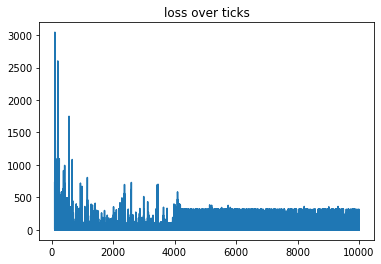

In [243]:
plt.plot(df['tick'], df['loss'])
#plt.yscale('log')
#plt.xlim(right=2000)
plt.title('loss over ticks')
plt.show()

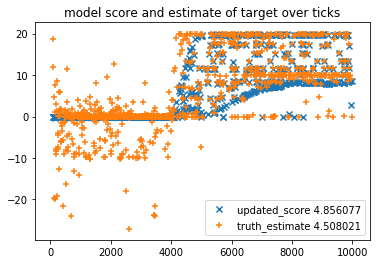

In [244]:
s = df.sample(1000)
plt.scatter(s['tick'], s['updated_score'], marker='x')
plt.scatter(s['tick'], s['truth_estimate'], marker='+')
plt.title('model score and estimate of target over ticks')
plt.legend(["updated_score %f" % (s['updated_score'].mean()), "truth_estimate %f" % (s['truth_estimate'].mean())])
plt.show()

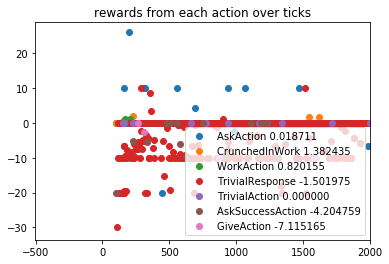

In [245]:
s = df.sample(5000)
actions = s['action_id'].unique()
for action in actions:
    plt.scatter(s.loc[df['action_id'] == action]['tick'], s.loc[df['action_id'] == action]['reward'])
plt.xlim(right=2000)
plt.legend(["%s %f" % (action, s.loc[df['action_id'] == action]['reward'].mean()) for action in actions])
plt.title('rewards from each action over ticks')
plt.show()

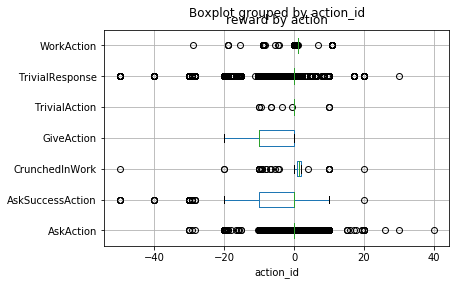

In [262]:
df.boxplot(column='reward', by='action_id', vert=False)
plt.title('reward by action')
plt.show()

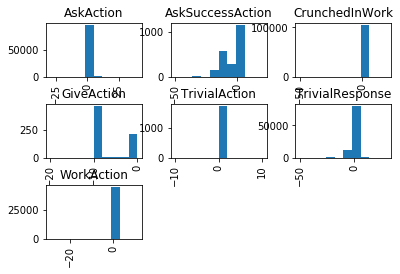

In [247]:
df['reward'].hist(by=df['action_id'])
plt.show()

In [248]:
df.groupby('action_id').count()

,learner,tick,learner_id,loss,dL_dy,updated_score,truth_estimate,reward
action_id,,,,,,,,
AskAction,96806,96806,96806,96806,96806,96806,96806,96806
AskSuccessAction,2196,2196,2196,2196,2196,2196,2196,2196
CrunchedInWork,104282,104282,104282,104282,104282,104282,104282,104282
GiveAction,703,703,703,703,703,703,703,703
TrivialAction,1717,1717,1717,1717,1717,1717,1717,1717
TrivialResponse,94143,94143,94143,94143,94143,94143,94143,94143
WorkAction,43992,43992,43992,43992,43992,43992,43992,43992


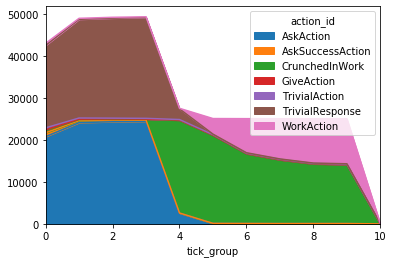

In [249]:
df['tick_group'] = df.apply(lambda row: int(row['tick']/1000), axis=1)
pivot = df.pivot_table(values='tick', index='tick_group', columns='action_id', aggfunc=pd.Series.count)
pivot.plot(kind='area')

In [250]:
pivot.tail()

action_id,AskAction,AskSuccessAction,CrunchedInWork,GiveAction,TrivialAction,TrivialResponse,WorkAction
tick_group,,,,,,,
6,102.0,3.0,16611.0,64.0,89.0,99.0,8134.0
7,82.0,1.0,15176.0,46.0,106.0,81.0,9590.0
8,87.0,1.0,14193.0,61.0,80.0,86.0,10579.0
9,85.0,2.0,14042.0,41.0,84.0,83.0,10748.0
10,NaN,NaN,14.0,NaN,NaN,NaN,11.0


In [256]:
action_df = pd.read_csv("/tmp/action_log.clean", sep='\t', names=
                     ['logger', 'tick', 'character_id', 'score', 'action_id', 'action_score'])

In [257]:
action_df

,logger,tick,character_id,score,action_id,action_score
0,action,1,0,19.797366,WorkAction,-0.271096
1,action,1,1,11.069693,AskAction,-0.000000
2,action,1,2,17.050016,AskAction,-0.000000
3,action,1,3,20.880499,AskAction,-0.000000
4,action,1,4,13.264521,AskAction,-0.000000
...,...,...,...,...,...,...
345453,action,9999,21,6925.883115,CrunchedInWork,11.578504
345454,action,9999,22,4794.948830,WorkAction,8.547069
345455,action,9999,23,8028.681160,CrunchedInWork,13.403971
345456,action,9999,24,4542.214053,WorkAction,8.547069


In [258]:
action_df.groupby(['character_id', 'action_id']).count()

logger  tick  score  action_score
character_id action_id                                          
0            AskAction           3844  3844   3844          3844
             AskSuccessAction     506   506    506           506
             CrunchedInWork      5974  5974   5974          5974
             GiveAction            29    29     29            29
             TrivialAction         76    76     76            76
...                               ...   ...    ...           ...
24           AskAction           3928  3928   3928          3928
             CrunchedInWork      1385  1385   1385          1385
             GiveAction            62    62     62            62
             TrivialAction         69    69     69            69
             WorkAction          4530  4530   4530          4530

[167 rows x 4 columns]

In [259]:
action_df.tail(1000).pivot_table(values='score', index='character_id', aggfunc=np.max)

,score
character_id,
0,10548.884151
1,5005.069693
2,4805.553496
3,3840.600284
4,6994.184368
5,12109.142719
6,12064.367847
7,9187.840862
8,4124.457374


In [260]:
action_df.tail(10000).pivot_table(values='action_score', index='character_id', columns='action_id', aggfunc=np.mean)

action_id,AskAction,CrunchedInWork,GiveAction,TrivialAction,TrivialResponse,WorkAction
character_id,,,,,,
0,0.0,17.529462,NaN,0.0,0.0,8.375036
1,0.0,0.136636,NaN,0.0,0.0,8.342247
2,0.0,8.417737,0.0,0.0,NaN,8.556023
3,0.0,8.199715,0.0,0.0,NaN,8.363760
4,0.0,11.702404,0.0,NaN,NaN,8.186380
5,0.0,19.626487,NaN,0.0,NaN,8.569609
6,NaN,19.638774,0.0,0.0,NaN,8.255229
7,NaN,15.290816,0.0,0.0,NaN,8.582807
8,NaN,2.482580,NaN,NaN,NaN,8.343953
